# 🌏 Plot 1: The Macro Plot

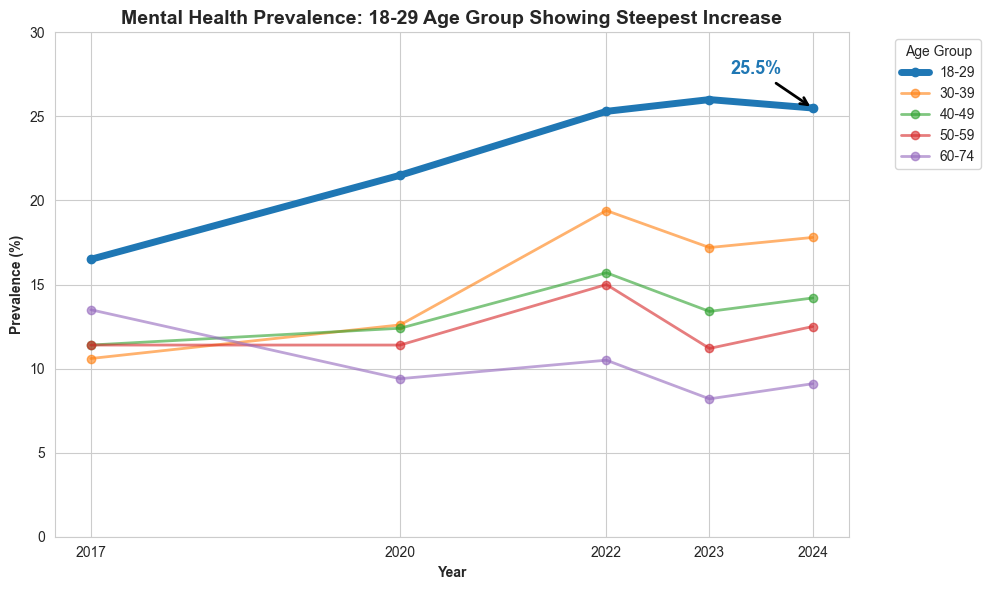

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('./data/Table_9_2_Prevalence_%_of_poor_mental_health_among_Singapore_residents.csv')

# Prep data
years = [2017, 2020, 2022, 2023, 2024]
age_groups = ['18-29', '30-39', '40-49', '50-59', '60-74']
age_data = df[df.iloc[:, 0].isin(age_groups)].copy()
age_data.columns = ['Age Group'] + years + list(df.columns[6:])
df_long = age_data[['Age Group'] + years].melt(id_vars='Age Group', var_name='Year', value_name='Prevalence')
df_long['Prevalence'] = pd.to_numeric(df_long['Prevalence'])

# Plotting
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Use a standard palette and bold the specific line
palette = sns.color_palette("tab10", len(age_groups))
color_map = dict(zip(age_groups, palette))

for age in age_groups:
    subset = df_long[df_long['Age Group'] == age]
    is_target = (age == '18-29')
    plt.plot(subset['Year'], subset['Prevalence'], 
             marker='o', 
             label=age, 
             linewidth=5 if is_target else 2, # BOLDED line for target
             alpha=1.0 if is_target else 0.6,
             color=color_map[age])

# SET Y-LIMIT TO 0-30
plt.ylim(0, 30) 

plt.title('Mental Health Prevalence: 18-29 Age Group Showing Steepest Increase', fontsize=14, fontweight='bold')
plt.ylabel('Prevalence (%)', fontweight='bold')
plt.xlabel('Year', fontweight='bold')
plt.xticks(years)
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')

# BOLDED Annotation for 18-29 in 2024
plt.annotate('25.5%', xy=(2024, 25.5), xytext=(2023.2, 27.5),
             arrowprops=dict(arrowstyle='->', color='black', lw=2),
             fontsize=13, fontweight='bold', color=color_map['18-29'])

plt.tight_layout()
plt.savefig('./figures/plot_1_mental_health_trends.png')
plt.show()

# 🧑‍🤝‍🧑 Plot 2: The Micro Plot

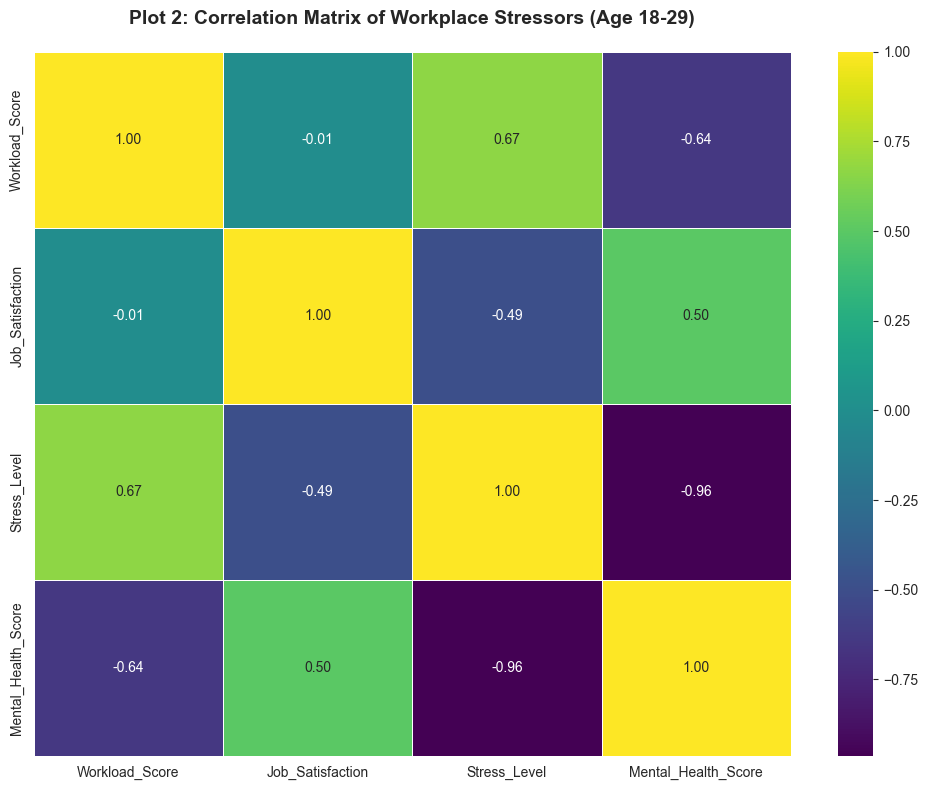

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load and Filter Data
df_stress = pd.read_csv('./data/employee_stress_dataset_2000.csv')
# Filtering for your target demographic (18-29)
df_youth = df_stress[(df_stress['Age'] >= 18) & (df_stress['Age'] <= 29)]

# 2. Select columns to analyze
# We include work-related stressors to show the "Why" behind the stress
cols_to_correlate = ['Workload_Score','Job_Satisfaction','Stress_Level', 'Mental_Health_Score'
]
corr_matrix = df_youth[cols_to_correlate].corr()

# 3. Plotting the Heatmap
plt.figure(figsize=(10, 8))
sns.set_style("white")

# cmap='viridis' is the colorblind-friendly palette
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=0.5)

plt.title('Plot 2: Correlation Matrix of Workplace Stressors (Age 18-29)', 
          fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.savefig('./figures/plot_2_correlation_matrix.png')
plt.show()

# 📢 Plot 3: The Actionable Plot

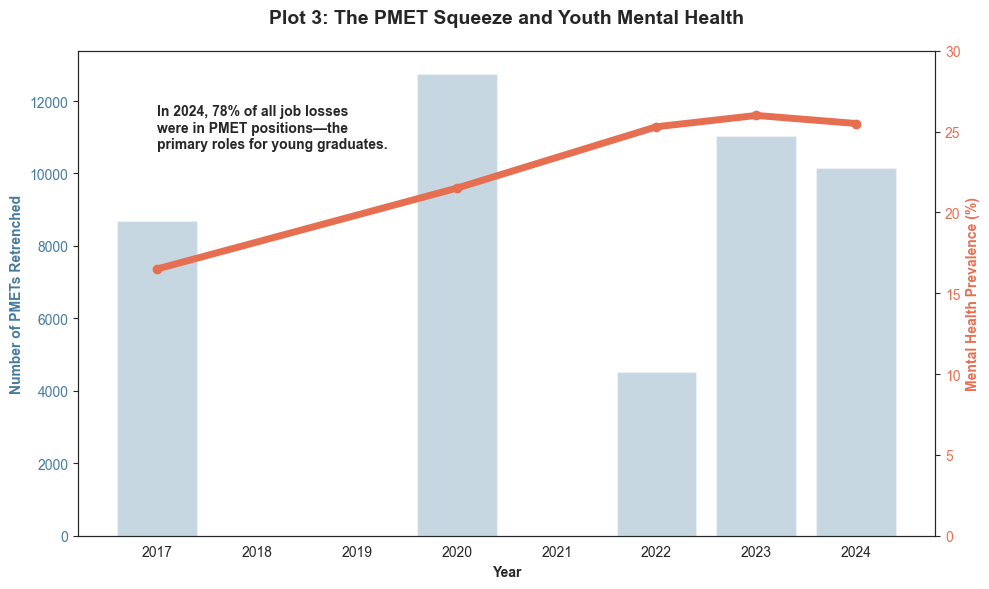

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load Datasets
df_ret2 = pd.read_csv('./data/ret_02_industry1_yr.csv')
# Use the actual filename you have for the NPHS data
df_npsh = pd.read_csv('./data/Table_9_2_Prevalence_%_of_poor_mental_health_among_Singapore_residents.csv')

# 2. Dynamically extract the Mental Health values for 18-29
# We find the row where the first column is '18-29'
target_row = df_npsh[df_npsh.iloc[:, 0] == '18-29']

# We take columns 1 to 5 (which correspond to 2017, 2020, 2022, 2023, 2024)
# .values[0] converts it to a simple list of numbers
mh_values = target_row.iloc[0, 1:6].astype(float).tolist()

target_years = [2017, 2020, 2022, 2023, 2024]

# 3. Filter for PMET total retrenchments
pmet_data = df_ret2[(df_ret2['occupation1'] == 'professionals, managers, executives and technicians') & 
                    (df_ret2['industry1'] == 'total') &
                    (df_ret2['year'].isin(target_years))].sort_values('year')
pmet_counts = pmet_data['retrench'].astype(int).tolist()

# 4. Plotting Dual-Axis
fig, ax1 = plt.subplots(figsize=(10, 6))
sns.set_style("white")

# Bars: PMET Retrenchments (MOM Data)
ax1.bar(target_years, pmet_counts, color='#457b9d', alpha=0.3, label='PMET Retrenchments')
ax1.set_xlabel('Year', fontweight='bold')
ax1.set_ylabel('Number of PMETs Retrenched', fontweight='bold', color='#457b9d')
ax1.tick_params(axis='y', labelcolor='#457b9d')

# Line: Mental Health Prevalence (NPHS Data)
ax2 = ax1.twinx()
ax2.plot(target_years, mh_values, marker='o', color='#e76f51', linewidth=5, label='Poor Mental Health (18-29)')
ax2.set_ylabel('Mental Health Prevalence (%)', fontweight='bold', color='#e76f51')
ax2.tick_params(axis='y', labelcolor='#e76f51')
ax2.set_ylim(0, 30)

plt.title('Plot 3: The PMET Squeeze and Youth Mental Health', fontsize=14, fontweight='bold', pad=20)

# PMET Insight Annotation
plt.text(2017, 24, 
         "In 2024, 78% of all job losses\nwere in PMET positions—the\nprimary roles for young graduates.", 
         fontsize=10, fontweight='bold', bbox=dict(facecolor='white', alpha=0.8))

fig.tight_layout()
plt.savefig('./figures/plot_3_pmet_link.png')
plt.show()